## Pytorch导数

    torch.autograd.backward(tensors, grad_tensors=None, retain_graph=None, create_graph=False, grad_variables=None)

- 功能：

    自动求取梯度
    
- tensors (Tensor序列)  

    计算导数的张量。

- grad_tensors (Tensor 或 None序列) 

    关于相应张量每个元素的梯度。标量张量或不需要梯度的可用None指定。如果None对所有grad_tensors可接受，则此参数可选。

- retain_graph (bool, 可选) 
    
    如果False，用于计算梯度的图将被释放。请注意，在几乎所有情况下，不需要将此选项设置为真，而且通常可以更有效地解决问题。默create_graph值。

- create_graph (bool, 可选) 

    如果True，则构造导数图，以便计算更高阶导数，默认False。

In [1]:
import torch

In [4]:
# ====================================== retain_graph ==============================================

w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

#y.backward(retain_graph=True) 1.4 版本其实已经默认了
#print(w.grad)
y.backward()
print(w.grad)

tensor([5.])


In [4]:
# ====================================== grad_tensors ==============================================

w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)     # retain_grad()
b = torch.add(w, 1)

y0 = torch.mul(a, b)    # y0 = (x+w) * (w+1)
y1 = torch.add(a, b)    # y1 = (x+w) + (w+1)    dy1/dw = 2

loss = torch.cat([y0, y1], dim=0)       # [y0, y1] 输出为多维向量的时候
grad_tensors = torch.tensor([1., 2.])   # 1* w.grad_y0+2*w.grad_y1

loss.backward(gradient=grad_tensors)    # gradient 传入 torch.autograd.backward()中的grad_tensors

print(w.grad)

tensor([9.])


    torch.autograd.grad(inputs, grad_outputs=None, retain_graph=None, create_graph=False, only_inputs=True, allow_unused=False)

功能：

   求取input的梯度
    
- inputs (Tensor序列) 

    关于将返回梯度的输入(不累加到.grad)。
    
- grad_outputs (Tensor序列) 

    关于每个输入的梯度。标量张量或不需要梯度的可用None指定。如果None对所有grad_tensors可接受，则此参数可选。默认：None。
    
- retain_graph (bool, 可选) 

    如果False，用于计算梯度的图将被释放。请注意，在几乎所有情况下，不需要将此选项设置为真，而且通常可以更有效地解决问题。默认为create_graph值。
    
- create_graph (bool, 可选) 

    如果True，则构造导数图，以便计算更高阶导数，默认False。

- allow_unused (bool, 可选) 

    如果False, 当计算输出出错时指明不使用的输入 (因此它们的梯度一直是0)。 默认False。

In [5]:
# ====================================== autograd.gard ==============================================
#  二阶导数

x = torch.tensor([3.], requires_grad=True)
y = torch.pow(x, 2)     # y = x**2

grad_1 = torch.autograd.grad(y, x, create_graph=True)   # grad_1 = dy/dx = 2x = 2 * 3 = 6
print(grad_1)

grad_2 = torch.autograd.grad(grad_1[0], x)              # grad_2 = d(dy/dx)/dx = d(2x)/dx = 2
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


**注意1**

    计算图梯度不会自动清零

In [10]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)
for i in range(4):
    y.backward(retain_graph=True)
    print(w.grad)

    w.grad.zero_()

tensor([5.])
tensor([5.])
tensor([5.])
tensor([5.])


In [2]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)
for i in range(4):
    y.backward(retain_graph=True)
    print(w.grad)

    #w.grad.zero_()

tensor([5.])
tensor([10.])
tensor([15.])
tensor([20.])


**注意2**

    依赖于叶子结点的节点，requires_grad默认为True

In [6]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

print(a.requires_grad, b.requires_grad, y.requires_grad)

True True True


**注意3**

    叶子节点不可执行in_place操作

In [7]:
# inplace操作理解
a = torch.ones((1, ))
print(id(a), a)

# a = a + torch.ones((1, )) # 非原地操作
# print(id(a), a)

a += torch.ones((1, )) # 原地操作
print(id(a), a)

1593581905816 tensor([1.])
1593581905816 tensor([2.])


In [8]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

w.add_(1)

y.backward()

RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

## 优化实例

![](./img/youhua.png)

In [11]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


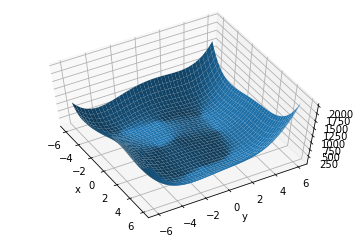

In [8]:
# ==================================== 函数优化实例 ================================================

def function_op(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

'''
绘制函数图像
'''

x=np.arange(-6,6,0.1)
y=np.arange(-6,6,0.1)

## 生成x,y平面
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)  ## 将点x，y进行匹配
print('X,Y maps:', X.shape, Y.shape)

Z = function_op([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [11]:
'''
函数优化
'''

# [1., 0.], [-4, 0.], [4, 0.]
x = torch.tensor([-4., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)   # 优化目标x，提供学习率
for step in range(20000):

    pred = function_op(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()  #更新一次

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))  #tolist将x转为list

step 0: x = [-3.999000072479248, -0.0009999999310821295], f(x) = 146.0
step 2000: x = [-3.526559829711914, -2.5002429485321045], f(x) = 19.4503231048584
step 4000: x = [-3.777446746826172, -3.2777843475341797], f(x) = 0.0012130826944485307
step 6000: x = [-3.7793045043945312, -3.283174753189087], f(x) = 5.636138666886836e-09
step 8000: x = [-3.779308319091797, -3.28318190574646], f(x) = 7.248672773130238e-10
step 10000: x = [-3.7793095111846924, -3.28318452835083], f(x) = 8.822098607197404e-11
step 12000: x = [-3.7793102264404297, -3.2831854820251465], f(x) = 8.185452315956354e-12
step 14000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 16000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 18000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
